#  Bitcoin Price Prediction & Analysis (2014-2023)
**Daily OHLCV Time Series Forecasting with Random Forest**


## Table of Contents
1. [📥 Data Loading & Overview](#data-loading)
2. [🔍 Exploratory Data Analysis](#eda)
3. [⚙️ Feature Engineering](#features)
4. [📈 Results & Evaluation](#results)
5. [🚀 Next Steps](#next


## Imports and Data Load

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## 📥 Data Loading & Overview


# Load data

In [41]:
df = pd.read_csv('/kaggle/input/bitcoin-price-analysis/bitcoin (1).csv')

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [25]:
print(df.head())

                 Close        High         Low        Open    Volume
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [26]:
print(df.head())

                 Close        High         Low        Open    Volume
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [27]:
print(df.describe())

               Close           High            Low           Open  \
count    4134.000000    4134.000000    4134.000000    4134.000000   
mean    27003.890261   27524.788487   26411.358297   26983.157505   
std     31769.798188   32299.170829   31181.581319   31757.880659   
min       178.102997     211.731003     171.509995     176.897003   
25%      2717.330017    2787.382568    2646.232544    2709.462463   
50%     10795.145508   11050.480957   10497.678711   10796.618652   
75%     42371.426758   43187.265625   41541.421875   42343.803711   
max    124752.531250  126198.070312  123196.046875  124752.140625   

             Volume  
count  4.134000e+03  
mean   2.166430e+10  
std    2.287787e+10  
min    5.914570e+06  
25%    1.318940e+09  
50%    1.711303e+10  
75%    3.322487e+10  
max    3.509679e+11  


# EDA and Visualization

In [28]:
# EDA and Visualization
# Basic stats and plots
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Price (USD)')

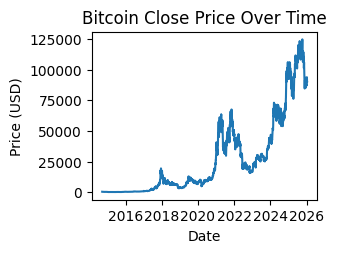

In [29]:
plt.subplot(2,2,1)
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

Text(0.5, 0, 'Price (USD)')

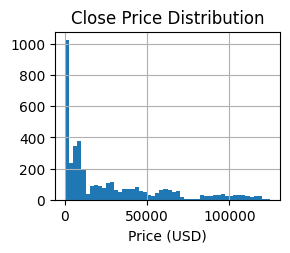

In [30]:
plt.subplot(2,2,2)
df['Close'].hist(bins=50)
plt.title('Close Price Distribution')
plt.xlabel('Price (USD)')

Text(0.5, 1.0, 'OHLC Boxplot')

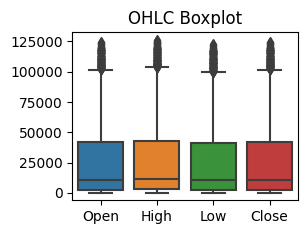

In [31]:
plt.subplot(2,2,3)
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('OHLC Boxplot')

Text(0, 0.5, 'Volume')

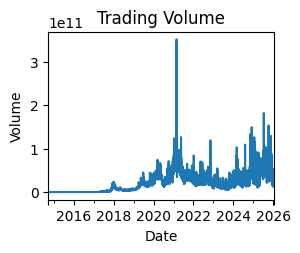

In [32]:

plt.subplot(2,2,4)
df['Volume'].plot()
plt.title('Trading Volume')
plt.ylabel('Volume')

count    4133.000000
mean        0.001902
std         0.035143
min        -0.371695
25%        -0.012422
50%         0.001206
75%         0.016051
max         0.252472
Name: Returns, dtype: float64


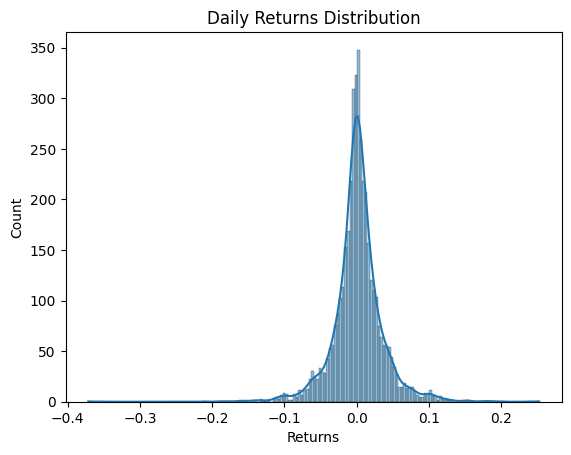

In [33]:
# Daily returns
df['Returns'] = df['Close'].pct_change()
print(df['Returns'].describe())
sns.histplot(df['Returns'], kde=True)
plt.title('Daily Returns Distribution')
plt.show()


# Feature Engineering

In [35]:
# Lags and technical indicators
df['Lag1'] = df['Close'].shift(1)
df['Lag7'] = df['Close'].shift(7)
df['MA5'] = df['Close'].rolling(5).mean()
df['MA30'] = df['Close'].rolling(30).mean()
  # RSI function below

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df.dropna(inplace=True)
print(df.head())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2014-10-16  382.556000  398.807007  373.070007  394.518005  26990000   
2014-10-17  383.757996  385.477997  375.389008  382.756012  13600700   
2014-10-18  391.441986  395.157990  378.971008  383.976013  11416800   
2014-10-19  389.545990  393.938995  386.457001  391.253998   5914570   
2014-10-20  382.845001  390.084015  378.252014  389.230988  16419000   

             Returns        Lag1        Lag7         MA5        MA30  
Date                                                                  
2014-10-16 -0.030947  394.773010  365.026001  389.432404  384.112801  
2014-10-17  0.003142  382.556000  361.562012  390.474200  381.660267  
2014-10-18  0.020023  383.757996  362.299011  390.679797  380.560333  
2014-10-19 -0.004844  391.441986  378.549011  388.414996  380.385333  
2014-10-20 -0.017202  389.545990  390.414001  386.029395  379.516700 